In [ ]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

In [ ]:
# function to load images

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

def load_video_images(path, size=(256,256)):
  files = os.listdir(path)
  files.sort()
  X = []
  # y = []

  for fn in files:
    destination = os.path.join(path, fn)
    image = tf.keras.preprocessing.image.load_img(destination, target_size = size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    source = image
    # source, target = image[:, :256], image[:, 256:]

    X.append(source)
    if len(X)>1999:
      break
    # y.append(target)
  
  X = np.array(X)
  # y = np.array(y)
 
  #normalizing
  X = (X-127.5)/127.5
  # y = (y-127.5)/127.5
  # print(f'Shape of the source images {X.shape}\nShape of the target images {y.shape}')
  print(f'Shape of the source images {X.shape} ')
  # return X, y
  return X

In [ ]:
gen = tf.keras.models.load_model('/content/model_color.h5')

In [ ]:
path_train = '/content/images'
X_train = load_video_images(path_train)

Shape of the source images (576, 256, 256, 3) 


In [ ]:
X_video = grayscale(X_train)

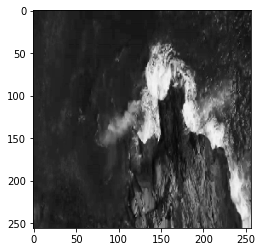

In [ ]:
plt.imshow(X_video[12,:,:,0],cmap='gray')

In [ ]:
video_out = gen.predict(X_video)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

SystemError: ignored

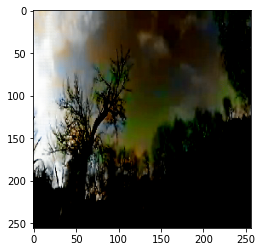

In [ ]:
import subprocess
import glob
def generate_video(img):
    for i in range(len(img)):
        plt.imshow(img[i])
        plt.savefig( "/content/data/file%04d.png" % i)

    os.chdir("/content/data")
    subprocess.call([
        'ffmpeg', '-framerate', '8', '-i', 'file%04d.png', '-r', '30', '-pix_fmt', 'yuv420p',
        '1.mp4'
    ])
for file_name in glob.glob("*.png"):
  os.remove(file_name)
generate_video(video_out)

In [ ]:
os.chdir("/content/data")
subprocess.call([
        'ffmpeg', '-framerate', '8', '-i', 'file%04d.png', '-r', '30', '-pix_fmt', 'yuv420p',
        '2.mp4'
    ])

0